# Welcome to Session 5

## Opening FITS files and loading the image data

## Display FITS file

Have you seen the Horsehead Nebula?

In [1]:
from astropy.visualization import astropy_mpl_style
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
# Important
from astropy.io import fits
from astropy.utils.data import download_file

In [2]:
# %matplotlib inline
plt.style.use(astropy_mpl_style)
image_file = download_file('http://www.astropy.org/astropy-data/tutorials/FITS-images/HorseHead.fits', cache=True)

Let’s open the FITS file to find out what it contains.

In [3]:
hdu_list = fits.open(image_file)
hdu_list.info()

Filename: C:\Users\souti\.astropy\cache\download\url\217b4fe80e6f349ef703ceed7e0be888\contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


Generally, the image information is located in the <code>PRIMARY</code> block. The blocks are numbered and can be accessed by indexing <code>hdu_list</code>.

In [45]:
hdu_list[0].header

SIMPLE  =                    T /FITS: Compliance                                
BITPIX  =                   16 /FITS: I*2 Data                                  
NAXIS   =                    2 /FITS: 2-D Image Data                            
NAXIS1  =                  891 /FITS: X Dimension                               
NAXIS2  =                  893 /FITS: Y Dimension                               
EXTEND  =                    T /FITS: File can contain extensions               
DATE    = '2014-01-09        '  /FITS: Creation Date                            
ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                
SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                
REGION  = 'ER768   '           /GSSS: Region Name                               
PLATEID = 'A0JP    '           /GSSS: Plate ID                                  
SCANNUM = '01      '           /GSSS: Scan Number                               
DSCNDNUM= '00      '        

.


In [6]:
image_data = hdu_list[0].data
image_data

array([[ 7201,  6642,  6642, ...,  9498,  9498, 10057],
       [ 6642,  6363,  6642, ..., 10057, 10616, 10616],
       [ 6922,  6642,  6922, ..., 10337, 11175, 10616],
       ...,
       [ 5412,  5132,  5412, ..., 13000, 12580, 12021],
       [ 5796,  5517,  5796, ..., 12546, 12546, 11987],
       [ 5796,  5796,  6076, ..., 11987, 12546, 12546]], dtype=int16)

Our data is now stored as a 2D numpy array.  But how do we know the dimensions of the image?  We can look at the `shape` of the array.

In [65]:
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(893, 891)


In [14]:
image_data1 = fits.getdata(image_file)
image_data1
# print(image_data.shape)

array([[ 7201,  6642,  6642, ...,  9498,  9498, 10057],
       [ 6642,  6363,  6642, ..., 10057, 10616, 10616],
       [ 6922,  6642,  6922, ..., 10337, 11175, 10616],
       ...,
       [ 5412,  5132,  5412, ..., 13000, 12580, 12021],
       [ 5796,  5517,  5796, ..., 12546, 12546, 11987],
       [ 5796,  5796,  6076, ..., 11987, 12546, 12546]], dtype=int16)

In [17]:
np.array_equal(image_data,image_data1)

True

Great! At this point, we can close the FITS file because we've stored everything we wanted to a variable.

In [18]:
hdu_list.close()

# Viewing the image data and getting basic statistics

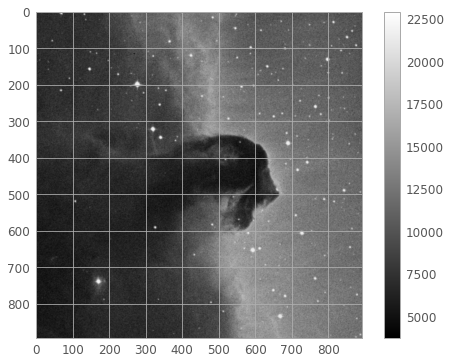

In [13]:
# %matplotlib inline
plt.imshow(image_data, cmap='gray')
plt.colorbar()

For more color maps http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps

Let's get some basic statistics about our image:

In [23]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Std deviation:', np.std(image_data))

Min: 3759
Max: 22918
Mean: 9831.481676287574
Std deviation: 3032.3927542049046


### Plotting a histogram

To make a histogram with `matplotlib.pyplot.hist()`, we'll need to cast the data from a 2D array to something one dimensional.

In this case, let's use the `ndarray.flatten()` to return a 1D numpy array.

In [81]:
image_data.flatten()

array([ 7201,  6642,  6642, ..., 11987, 12546, 12546], dtype=int16)

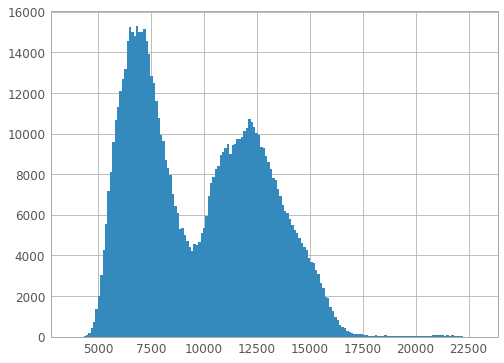

In [84]:
histogram = plt.hist(image_data.flatten(), bins='auto')

## Same thing but logarithmic!

What if we want to use a logarithmic color scale? To do so, we'll need to load the `LogNorm` object from `matplotlib`.

In [9]:
from matplotlib.colors import LogNorm

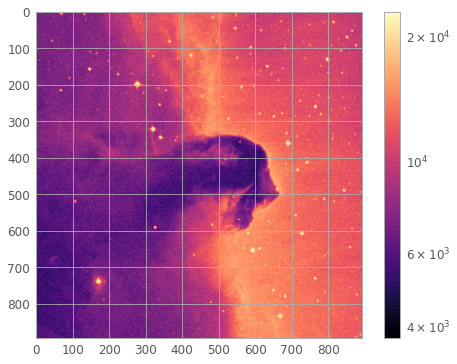

In [11]:
plt.imshow(image_data, cmap='magma', norm=LogNorm())

plt.colorbar()

# M42 - Orion Nebula

https://dr12.sdss.org/fields

In [44]:
g=fits.open(r"C:\Users\souti\Downloads\Course Resources\frame-u-006073-4-0063.fits")
g[0].header

SIMPLE  =                    T /                                                
BITPIX  =                  -32 / 32 bit floating point                          
NAXIS   =                    2                                                  
NAXIS1  =                 2048                                                  
NAXIS2  =                 1489                                                  
EXTEND  =                    T /Extensions may be present                       
BZERO   =              0.00000 /Set by MRD_SCALE                                
BSCALE  =              1.00000 /Set by MRD_SCALE                                
TAI     =        4649973257.37 / 1st row Number of seconds since Nov 17 1858    
RA      =            83.820000 / 1st row RA of telescope boresight (deg)        
DEC     =           -5.349071  / 1st row Dec of telescope boresight (degrees)   
SPA     =             180.000  / 1st row Cam col position angle wrt N (deg)     
IPA     =             137.18

In [29]:
# plt.figure()
# plt.imshow(fits.getdata('frame-g-005183-2-0406.fits'), cmap='Greens')
# image_hist = plt.hist(fits.getdata('frame-g-005183-2-0406.fits').flatten(), bins='auto')

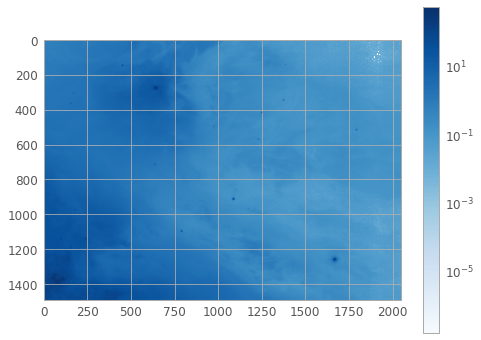

In [23]:
plt.figure()
plt.imshow(fits.getdata('frame-u-006073-4-0063.fits'),norm=LogNorm(),cmap="Blues")
cbar = plt.colorbar()


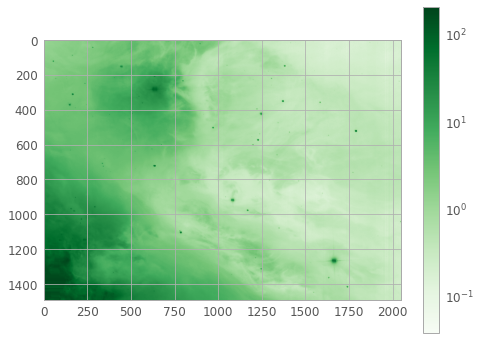

In [31]:
plt.figure()
plt.imshow(fits.getdata('frame-g-006073-4-0063.fits'),norm=LogNorm(),cmap="Greens")
cbar = plt.colorbar()

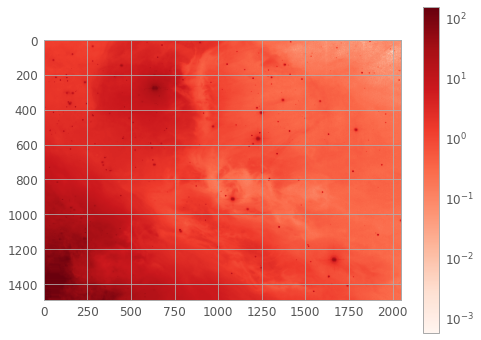

In [21]:
plt.figure()
plt.imshow(fits.getdata("frame-i-006073-4-0063.fits"),norm=LogNorm(),cmap="Reds")
cbar = plt.colorbar()

# Combining into colourful from individual filters

In [24]:
from astropy.visualization import make_lupton_rgb 

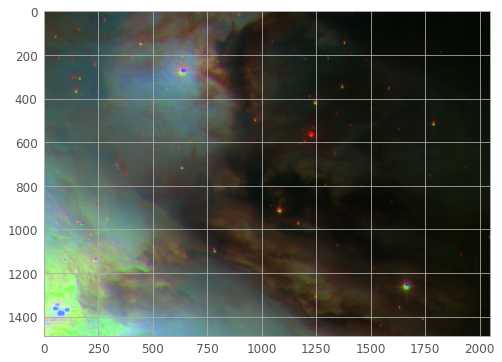

In [34]:
b=fits.getdata('frame-u-006073-4-0063.fits')
r=fits.getdata('frame-i-006073-4-0063.fits')
g=fits.getdata('frame-g-006073-4-0063.fits')
plt.figure()
plt.imshow(make_lupton_rgb(r,g,b))


## Convert jpg to fits

Load and display the original 3-color jpeg image:

Image size: 1280 x 960


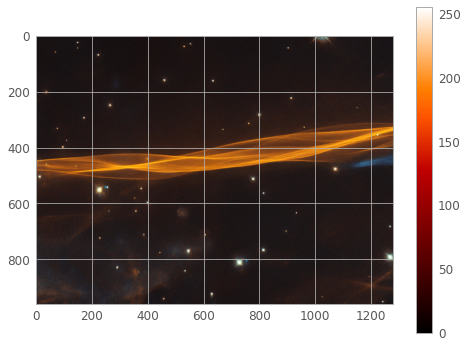

In [36]:
# %matplotlib inline
import numpy as np
from PIL import Image
from astropy.io import fits
import matplotlib.pyplot as plt
# from astropy.visualization import astropy_mpl_style
# plt.style.use(astropy_mpl_style)
image = Image.open('hubble_image.jpeg')
xsize, ysize = image.size
print("Image size: {} x {}".format(xsize, ysize))
plt.imshow(image)
np.array(image.getdata())
plt.colorbar()

In [27]:
r, g, b = image.split()
r_data = np.array(r.getdata()) # data is now an array of length ysize*xsize
g_data = np.array(g.getdata())
b_data = np.array(b.getdata())
print(r_data.shape)
r_data

(1228800,)


array([25, 25, 24, ..., 27, 27, 28])

Split the three channels (RGB) and get the data as Numpy arrays. The arrays
are flattened, so they are 1-dimensional:



In [28]:
r_data = r_data.reshape(ysize, xsize)
g_data = g_data.reshape(ysize, xsize)
b_data = b_data.reshape(ysize, xsize)

red = fits.PrimaryHDU(data=r_data)
red.writeto('red.fits')

green = fits.PrimaryHDU(data=g_data)
green.writeto('green.fits')

blue = fits.PrimaryHDU(data=b_data)
blue.writeto('blue.fits')

Display are three

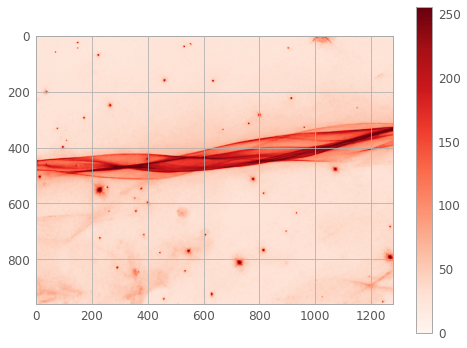

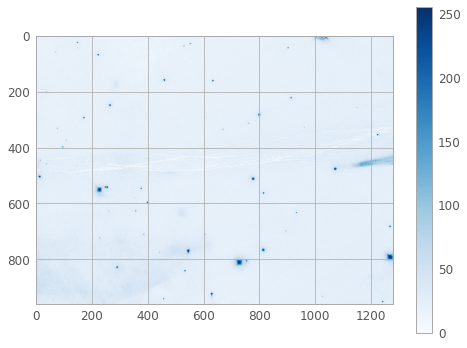

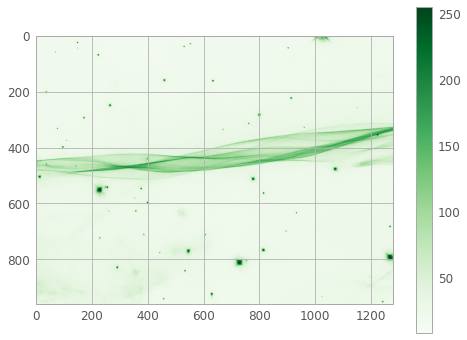

In [29]:
plt.figure()
plt.imshow(fits.getdata('red.fits'),cmap="Reds")
plt.colorbar()
plt.figure()
plt.imshow(fits.getdata('blue.fits'),cmap="Blues")
plt.colorbar()
plt.figure()
plt.imshow(fits.getdata('green.fits'),cmap="Greens")
plt.colorbar()

In [30]:
red_image=fits.open('red.fits')
red_image[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1280                                                  
NAXIS2  =                  960                                                  
EXTEND  =                    T                                                  

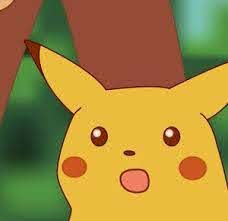

.

## Writing into FITS

In [31]:
hdulist = fits.open('red.fits')
# hdulist.info()
hdulist[0].header
# hdulist.close()

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1280                                                  
NAXIS2  =                  960                                                  
EXTEND  =                    T                                                  

In [56]:
fits.setval('red.fits', 'OBSERVER', value='Soutik Nandy')
fits.setval('red.fits', 'Date', value='11-08-2021')
fits.setval('red.fits', 'AUTHOR', value='Spaceonova')

In [57]:
hdulist = fits.open('red.fits')
# hdulist.info()
HDU=hdulist[0].header
HDU
# hdulist.close()

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1280                                                  
NAXIS2  =                  960                                                  
EXTEND  =                    T                                                  
OBSERVER= 'Soutik Nandy'       / My name                                        
DATE    = '11-08-2021'         / Date of the session                            
AUTHOR  = 'Spaceonova'         / The great                                      
MESSAGE = 'Today is 11th August' / Not giving a comment.                        

In [52]:
fits.setval('red.fits', 'Message', value='Today is 11th August',comment="Not giving a comment.")